# after data engeenering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

## Load data & setting

In [15]:
dataset = pd.read_csv("./new_titanic_mid_output/new_titanic_mid.csv")
train = pd.read_csv("dataset/train.csv")
# train_len = len(train)
# => 이전에 drop시킨 값들 이상치들 때문에 len이 안맞음
train_len = 881

In [16]:
# 저장할 때 index=False해주어야 한다.
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


## 6. MODELING

In [17]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [20]:
## Separate train features and label 
# train set을 target feature과 label feature로 구분

train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

/Users/kimyihwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 6.1 Simple modeling

#### 6.1.1 Cross validate models

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified(계층의) kfold cross validation procedure.  

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceptron ( neural network )
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [21]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

0
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
1
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
2
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
3
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
4
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
5
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
6
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
7
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545 0.77272727 0.875      0.85227273]
8
[0.82022472 0.82954545 0.75       0.875      0.82954545 0.79545455
 0.82954545

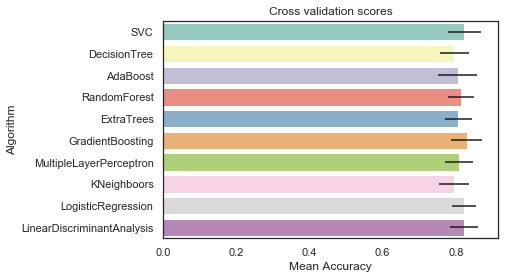

In [28]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
cnt = 0
for classifier in classifiers :
    print(cnt)
    cnt += 1
    score_list = cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    cv_results.append(score_list)
    print(score)

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling.
